# Stack Overflow 2017 Survey Analysis


## Introduction

Stack Overflow's annual Develop Survey is a major resource for people who code around the world. Each year, they publish the results publicly and the data captured can be very informative to give insight into the everything from developers' favourite programming tools, salaries to job preferences and job satisfaction. In this notebook, I will be doing some exploratory analysis on the 2017 Survery Results to answer some questions.

I will be following the CRISP-DM process when approaching the data, which consist of the following stages:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Evaluate the Results


### Business Understanding

I will be exploring the 2017 Stack Overflow survery results in this notebook in order to gain some information regarding programming languages used by professional developers and what consequences they have.

The three main questions I will seek to answer are below:

1. What is the average salary for each programming language? And which programming language, on average, is most rewarding?
2. What is the average job satisfaction for each programming language? And which programming language, on average, gives the most job satisfaction?
3. Which programming languages were the most popular for the top 5 countries (defined by number of entries in the survery) for languages worked with and languages wanted to work with?

First, let's import the necessary python libraries that we will need:


In [1]:
# Import the necessary libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

### Data Understanding

In order to understand what kind of data we have, we can read in the data as a Data Frame and view the first 4 rows to understand the full range of columns and data types we have.

In [2]:
# Import the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [3]:
# Get a complete list of columns in the dataset
df.columns.tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

### Q1. What is the average salary for each programming language? And which programming language, on average, is most rewarding?

### Data Preparation

In order to prepare the data we need, we will only be selecting the necessary columns and filtering the dataset on rows where the entry is a Profession developer.

Additionaly, we will drop any rows where HaveWorkedLanguage or Salary is null as we need to find information regarding both and so require both of them to be populated.


In [4]:
# Drop irrelavant columns, filter dataset and drop null values
df_salary = df[['Professional', 'HaveWorkedLanguage', 'Salary']]
df_salary = df_salary[df_salary.Professional == "Professional developer"]
df_salary = df_salary.drop('Professional', 1)
df_salary = df_salary.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
df_salary.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


### Data Modelling

We will now split the column of programming languages and retain the associated salary value. This is necessary to calculate the average salary for each programming language, that we can then plot a bar graph of to visualise.

In [5]:
# Create function to split column by delimeter
def split_column(column_split, delimeter, column_store, df):
    """
    Split column values by delimiter and expand so new DataFrame has 
    one split value of associated column per row.
    
    Param:
    column_to_split: str
        column whose values are to be split
    delimeter: str
        delimeter to split by
    columns_to_store: str
        column who's data must be stored along split rows
    df: pandas.DataFrame
        dataframe to use
    
    Return:
    Pandas DataFrame with same columns as df
    """
    split_col = pd.DataFrame(columns = [column_split, column_store])
    for index, row in df.iterrows():
        columns = row[column_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_store]]
    return split_col

In [6]:
# Split column
languages_split = split_column('HaveWorkedLanguage','; ','Salary',df_salary)
languages_split.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


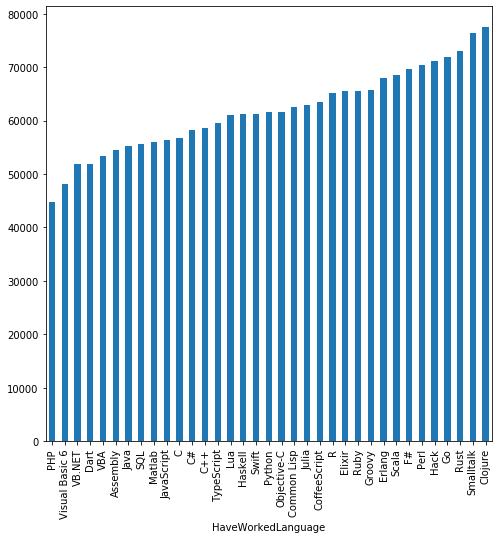

In [7]:
# Group by and calcuate mean salary for each programming language
avg_salary = languages_split.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(8,8))
# Plot results
avg_salary.plot(kind = 'bar')
plt.savefig('Q1_AverageSalary')

### Evaluate Results

As evident by the graph, on average Clojure tends to give the most rewarding salaries, while languages such as Java, SQL or Visual Basic tend to have comparatively lower salaries. This makes sense, as Clojure is not that well known and so languages known by few people would be high in demand as compared to more popular languages.

### Q2. What is the average job satisfaction for each programming language? And which programming language, on average, gives the most job satisfaction?

### Data Preparation

In order to prepare the data we need, we will only be selecting the necessary columns and filtering the dataset on rows where the entry is a Profession developer.

Additionaly, we will drop any rows where HaveWorkedLanguage or JobSatisfaction is null as we need to find information regarding both and so require both of them to be populated.

In [8]:
# Drop irrelavant columns, filter dataset and drop null values
df_satisfy = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]
df_satisfy = df_satisfy[df_satisfy.Professional == "Professional developer"]
df_satisfy = df_satisfy.drop('Professional', 1)
df_satisfy = df_satisfy.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
df_satisfy.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


### Data Modelling

We will now split the column of programming languages and retain the associated job satisfaction value. This is necessary to calculate the average job satisfaction for each programming language, that we can then plot a bar graph of to visualise.

In [9]:
# Split column
languages_split2 = split_column('HaveWorkedLanguage','; ','JobSatisfaction',df_satisfy)
languages_split2.head()

,HaveWorkedLanguage,JobSatisfaction
0,Java,9.0
1,PHP,9.0
2,Python,9.0
3,CoffeeScript,7.0
4,Clojure,7.0


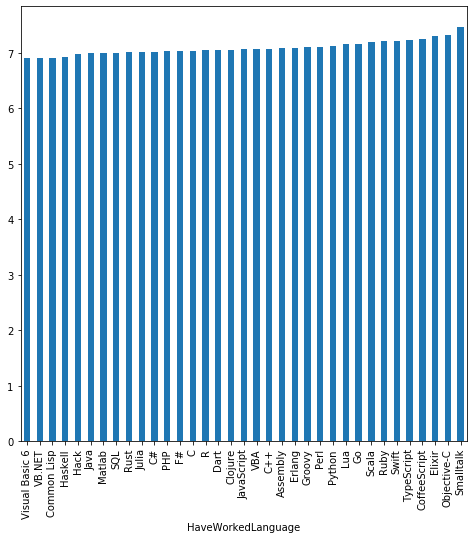

In [10]:
# Group by and calcuate mean job satisfaction for each programming language
avg_satisfy = languages_split2.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
plt.figure(figsize=(8,8))
# Plot results
avg_satisfy.plot(kind = 'bar')
plt.savefig('Q2_AverageJobSatisfaction')

### Evaluate Results

As evident by the graph, on average Smalltalk tends to give the most Job Satisfaction, while languages such as Java, VB.NET or Visual Basic tend to have comparatively lower job satisfaction. This may tie in with the above salary observation as a higher salary can correlate to higher job satisfaction.

### Q3. Which programming languages were the most popular for the top 5 countries (defined by number of entries in the survery) for languages worked with and languages wanted to work with?

### Data Preparation

In order to prepare the data we need, we will only be selecting the necessary columns and filtering the dataset on rows where the entry is a Profession developer.

Additionaly, we will drop any rows where HaveWorkedLanguage or Country is null (same with WantWorkLanguage & Country) as we need to find information regarding both and so require both of them to be populated.

In [11]:
# Drop irrelavant columns, filter dataset and drop null values
df_langworked = df[['Professional', 'HaveWorkedLanguage','Country']]
df_langworked = df_langworked[df_langworked.Professional == "Professional developer"]
df_langworked = df_langworked.drop('Professional', 1)
df_langworked = df_langworked.dropna(axis=0)
df_langworked.head()

,HaveWorkedLanguage,Country
2,Java; PHP; Python,United Kingdom
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Poland
8,C#; JavaScript,Colombia
9,Objective-C; Swift,France
13,Java; JavaScript; Ruby; SQL,Germany


In [12]:
# Drop irrelavant columns, filter dataset and drop null values
df_langwant = df[['Professional', 'WantWorkLanguage','Country']]
df_langwant = df_langwant[df_langwant.Professional == "Professional developer"]
df_langwant = df_langwant.drop('Professional', 1)
df_langwant = df_langwant.dropna(axis=0)
df_langwant.head()

,WantWorkLanguage,Country
2,C; Python; Rust,United Kingdom
7,Clojure; Elixir; Haskell; Scala,Poland
8,F#; Go,Colombia
9,C#; Java; Objective-C; Swift,France
13,JavaScript; Ruby; Rust; Swift,Germany


### Data Modelling

First we need to calculate the top 5 countries in which the most entries in the survery were filled out for. We would then need to take a subset of this data by filtering for only those countries. Additionally, similar to before, we will split the column of programming languages and retain the associated country value. This is necessary to calculate the count for each programming language in each country, that we can then plot a bar graph of to visualise.

In [13]:
# Group by country and calculate top 5 countries which entries were made for
country_worked = df_langworked.groupby('Country').count()
country_worked.rename(columns = {'HaveWorkedLanguage':'Count'}, inplace = True)
country_worked.sort_values('Count',ascending = False).head(5)

,Count
Country,
United States,6862
United Kingdom,2711
Germany,2157
India,2010
Canada,1299


In [14]:
# Group by country and calculate top 5 countries which entries were made for
country_want = df_langwant.groupby('Country').count()
country_want.rename(columns = {'WantWorkLanguage':'Count'}, inplace = True)
country_want.sort_values('Count',ascending = False).head(5)

,Count
Country,
United States,6325
United Kingdom,2446
Germany,1968
India,1809
Canada,1184


In [15]:
# Filter dataset on top 5 countries
countries = ['United States','United Kingdom','Germany','India','Canada']
df_langworkedsubset = df_langworked[df_langworked['Country'].isin(countries)]
df_langworkedsubset.head(5)

,HaveWorkedLanguage,Country
2,Java; PHP; Python,United Kingdom
13,Java; JavaScript; Ruby; SQL,Germany
14,Assembly; C; C++,United Kingdom
15,JavaScript; VB.NET,United States
16,JavaScript,United Kingdom


In [16]:
# Filter dataset on top 5 countries
df_langwantsubset = df_langwant[df_langwant['Country'].isin(countries)]
df_langwantsubset.head(5)

,WantWorkLanguage,Country
2,C; Python; Rust,United Kingdom
13,JavaScript; Ruby; Rust; Swift,Germany
14,Assembly; C; C++; Python,United Kingdom
15,C#; F#; JavaScript; R; VB.NET,United States
16,Clojure,United Kingdom


In [17]:
# Split column
languages_splitwork = split_column('HaveWorkedLanguage','; ','Country',df_langworkedsubset)
languages_splitwork.head()

,HaveWorkedLanguage,Country
0,Java,United Kingdom
1,PHP,United Kingdom
2,Python,United Kingdom
3,Java,Germany
4,JavaScript,Germany


In [18]:
# Split column
languages_splitwant = split_column('WantWorkLanguage','; ','Country',df_langwantsubset)
languages_splitwant.head()

,WantWorkLanguage,Country
0,C,United Kingdom
1,Python,United Kingdom
2,Rust,United Kingdom
3,JavaScript,Germany
4,Ruby,Germany


In [19]:
# Group by and calcuate count for top 5 programming language in top 5 countries
languages_workgroup = languages_splitwork.groupby('Country')['HaveWorkedLanguage'].value_counts()
languages_workgroup = languages_workgroup.groupby(level=0).nlargest(5)
languages_workgroup = languages_workgroup.reset_index(level=0, drop=True)
languages_workgroup

Country         HaveWorkedLanguage
Canada          JavaScript             896
                SQL                    709
                C#                     544
                Java                   450
                Python                 428
Germany         JavaScript            1356
                SQL                   1083
                Java                   987
                C#                     708
                PHP                    644
India           JavaScript            1195
                SQL                    997
                Java                   934
                PHP                    610
                C#                     485
United Kingdom  JavaScript            1891
                SQL                   1543
                C#                    1221
                Java                   738
                PHP                    697
United States   JavaScript            4710
                SQL                   3802
                C# 

In [20]:
# Group by and calcuate count for top 5 programming language in top 5 countries
languages_wantgroup = languages_splitwant.groupby('Country')['WantWorkLanguage'].value_counts()
languages_wantgroup = languages_wantgroup.groupby(level=0).nlargest(5)
languages_wantgroup = languages_wantgroup.reset_index(level=0, drop=True)
languages_wantgroup

Country         WantWorkLanguage
Canada          JavaScript           636
                SQL                  424
                Python               423
                C#                   422
                Java                 266
Germany         JavaScript           849
                SQL                  617
                Java                 586
                Python               576
                C#                   551
India           JavaScript           950
                Java                 722
                Python               689
                SQL                  647
                C#                   367
United Kingdom  JavaScript          1252
                C#                   974
                SQL                  839
                Python               731
                TypeScript           557
United States   JavaScript          3271
                Python              2294
                SQL                 2207
                C#      

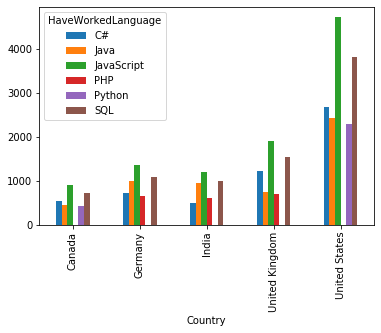

In [21]:
# Plot results
df_work = languages_workgroup.unstack()
df_work.plot(kind = 'bar')
plt.savefig('Q3_PopularWorkedWithLanguage')

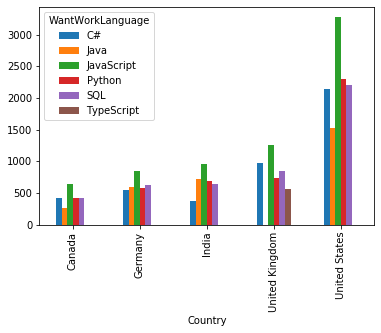

In [22]:
# Plot results
df_want = languages_wantgroup.unstack()
df_want.plot(kind = 'bar')
plt.savefig('Q3_PopularWantWorkLanguage')

### Evaluation

As evident by the graphs, JavaScript tends be the most popular programming language that professional developers currently work with SQL following close behind. Compared to programming languages that professional developers want to work with, it seems as though JavaScript still is the most popular, however Python has a bigger increase from the previous graph indicating that many are keen to want to use this programming language as well.